# Clustering

__Clustering is a method of statistical analysis used to organize raw data into homogeneous silos. ... The scheduling tool is an algorithm that measures the proximity between each element based on defined criteria.__

![](https://www.imperva.com/blog/wp-content/uploads/sites/9/2017/07/k-means-clustering-on-spherical-data-1v2.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns

This code snippet imports several Python libraries that will be used in the rest of the code. Here's what each library does:

matplotlib.pyplot is a module in the matplotlib library that provides a variety of functions for creating plots in Python.
numpy is a library that provides support for large, multi-dimensional arrays and matrices, along with a large collection of mathematical functions to operate on these arrays.
pandas is a library that provides data structures and functions for working with structured data, including tables of data known as DataFrames.
matplotlib.style is a module in the matplotlib library that provides functionality for customizing the visual style of plots.
seaborn is a library that provides a variety of functions for creating more visually appealing and informative statistical graphics than the default options in matplotlib.
By importing these libraries, the code can access their functionality throughout the rest of the code.

In [2]:
data=pd.read_csv("../input/housedata/data.csv")
pd.set_option('display.max_columns', None)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


This code snippet reads in a CSV file named "data.csv" located in the "../input/housedata/" directory relative to the current working directory using the pd.read_csv() function from the pandas library.

The pd.set_option('display.max_columns', None) line sets a pandas option to display all columns of the DataFrame in the output, regardless of the number of columns.

Finally, the data.head() function is called to display the first five rows of the DataFrame data. The .head() function is a pandas method that returns the first n rows of a DataFrame (by default n=5), allowing the user to quickly view the structure and content of the data.

In [3]:
data.shape

(4600, 18)

This code snippet returns the shape of the DataFrame data using the .shape attribute.

The shape attribute of a pandas DataFrame returns a tuple representing the dimensions of the DataFrame, where the first element is the number of rows and the second element is the number of columns.

So, data.shape will return a tuple of two integers, where the first integer represents the number of rows and the second integer represents the number of columns in the DataFrame data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

This code snippet displays the summary of the DataFrame data using the .info() method.

The .info() method is a pandas method that provides a concise summary of a DataFrame, including the number of non-null values, the data types of each column, and the memory usage. This method can be useful for quickly checking the presence of missing values and the data types of each column, which can help to identify potential data quality issues or type mismatches.

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


This code snippet generates descriptive statistics of the DataFrame data using the .describe() method.

The .describe() method is a pandas method that provides a statistical summary of a DataFrame's numeric columns. It calculates the count, mean, standard deviation, minimum, and maximum values for each numeric column in the DataFrame.

This method can be useful for quickly understanding the distribution of the data, identifying potential outliers, and detecting other issues that may need to be addressed before performing further analysis or modeling.

In [6]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

This code snippet returns the number of missing values in each column of the DataFrame data using the .isnull().sum() method.

The .isnull() method is a pandas method that returns a DataFrame of the same shape as the original DataFrame, where each value is a boolean indicating whether the original value was null (missing) or not.

The .sum() method is then called on this boolean DataFrame to count the number of True values (which represent missing values) in each column.

This method can be useful for quickly identifying columns with missing data and understanding the scope of missing values in each column.

In [7]:
import datetime as dt
data["date"]=pd.to_datetime(data["date"])
data['Date_year'] =data["date"].dt.year
data['Date_month'] = data["date"].dt.month
data['Date_day'] = data["date"].dt.day
data['Date_hour'] =data["date"].dt.hour
data['Date_minute'] = data["date"].dt.minute
data['Date_seconde'] = data["date"].dt.second

This code snippet creates new columns in the DataFrame data by extracting different components of the date column.

First, the pd.to_datetime() function from the pandas library is used to convert the date column of data into a datetime data type, which allows it to be more easily manipulated.

Next, the .dt accessor is used to extract different components of the datetime, such as year, month, day, hour, minute, and second. These components are then assigned to new columns in data with names Date_year, Date_month, Date_day, Date_hour, Date_minute, and Date_second, respectively.

This approach allows the code to extract and work with different parts of the datetime column, which can be useful in time series analysis or other types of temporal analysis.

In [8]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2,0,0,0
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2,0,0,0
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2,0,0,0
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2,0,0,0
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2,0,0,0


After the code you provided, the data.head() method will display the first few rows of the DataFrame data with the newly created columns Date_year, Date_month, Date_day, Date_hour, Date_minute, and Date_second.

Each row in the DataFrame now contains the original data as well as additional columns that break down the date and time components of the date column.

These new columns could be used in further analysis or modeling, such as exploring patterns in house prices over time or incorporating time-based features into a predictive model.

In [9]:
dataa=data.copy()

This code snippet creates a copy of the DataFrame data and assigns it to a new variable dataa.

The data.copy() method creates a new DataFrame with the same data and column names as the original DataFrame. This new DataFrame is completely independent of the original DataFrame, meaning that any changes made to dataa will not affect the original data DataFrame.

Creating a copy of the original DataFrame is often done to preserve the original data and avoid making any unintended modifications to the data during analysis or modeling.

In [10]:
data.drop(["date"], axis=1, inplace=True)


This code snippet drops the date column from the DataFrame data using the .drop() method.

The .drop() method is a pandas method used to remove rows or columns from a DataFrame based on their labels. In this case, the label being dropped is the date column.

The axis=1 argument specifies that the column should be dropped (as opposed to a row), and the inplace=True argument specifies that the original DataFrame data should be modified directly (as opposed to returning a new DataFrame with the column dropped).

After this line of code is executed, the data DataFrame will no longer contain the date column.

In [11]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'Date_year', 'Date_month', 'Date_day', 'Date_hour', 'Date_minute',
       'Date_seconde'],
      dtype='object')

This code snippet returns a list of all the column names in the DataFrame data using the .columns attribute.

The .columns attribute is a pandas attribute that returns an Index object, which is essentially an immutable array-like object that contains the column labels of the DataFrame.

By calling data.columns, the code is able to retrieve a list of all the column names in the DataFrame, which can be useful for understanding the structure of the data and selecting specific columns for analysis or modeling.

In [12]:
data.drop(["street"], axis=1, inplace=True)

This code snippet drops the street column from the DataFrame data using the .drop() method.

The .drop() method is a pandas method used to remove rows or columns from a DataFrame based on their labels. In this case, the label being dropped is the street column.

The axis=1 argument specifies that the column should be dropped (as opposed to a row), and the inplace=True argument specifies that the original DataFrame data should be modified directly (as opposed to returning a new DataFrame with the column dropped).

After this line of code is executed, the data DataFrame will no longer contain the street column.

In [13]:
data.drop(["statezip"], axis=1, inplace=True)

This code snippet drops the statezip column from the DataFrame data using the .drop() method.

The .drop() method is a pandas method used to remove rows or columns from a DataFrame based on their labels. In this case, the label being dropped is the statezip column.

The axis=1 argument specifies that the column should be dropped (as opposed to a row), and the inplace=True argument specifies that the original DataFrame data should be modified directly (as opposed to returning a new DataFrame with the column dropped).

After this line of code is executed, the data DataFrame will no longer contain the statezip column.

In [14]:
stl.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

This code snippet returns a list of available styles in the matplotlib.style module using the .available attribute.

The matplotlib.style module provides functionality for customizing the visual style of plots created using the matplotlib library.

By calling stl.available, the code is able to retrieve a list of all the available styles that can be used in matplotlib, which can be useful for selecting a style that best suits the data being plotted or for creating custom styles.

In [15]:
stl.use('ggplot')

This code snippet sets the plot style for matplotlib to the "ggplot" style using the .use() function in the matplotlib.style module.

The "ggplot" style is one of the available styles in matplotlib that mimics the aesthetics of the popular ggplot2 library in R. This style is often used for creating more visually appealing and informative plots, particularly for exploratory data analysis.

By calling stl.use('ggplot'), the code sets the plot style to "ggplot", meaning that any subsequent plots created using matplotlib will use this style by default, unless another style is specified.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


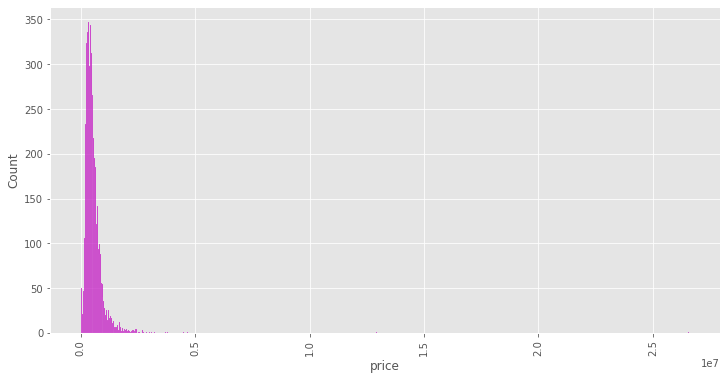

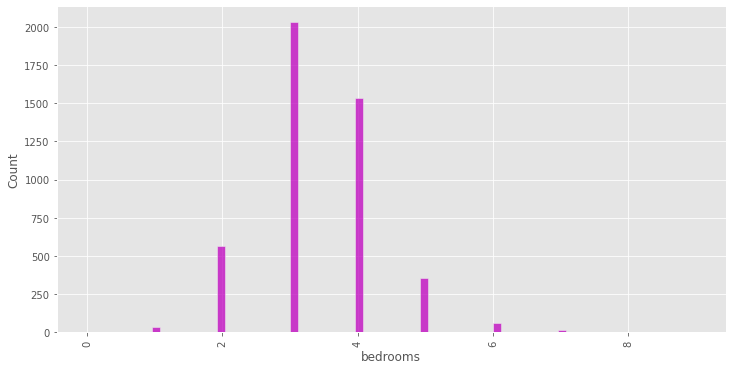

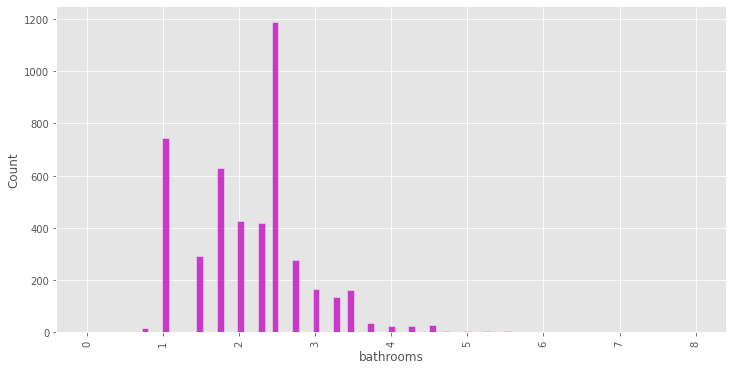

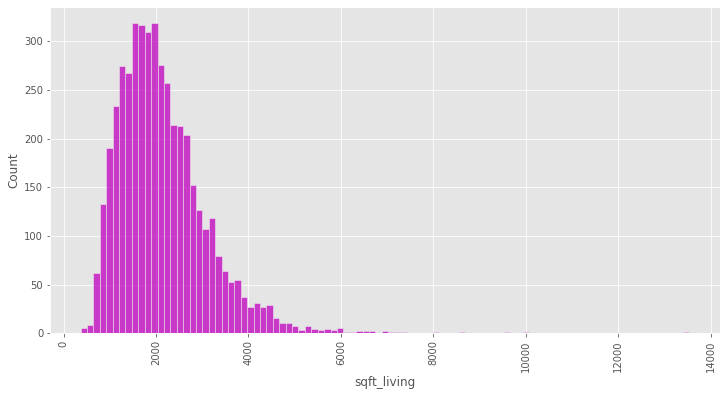

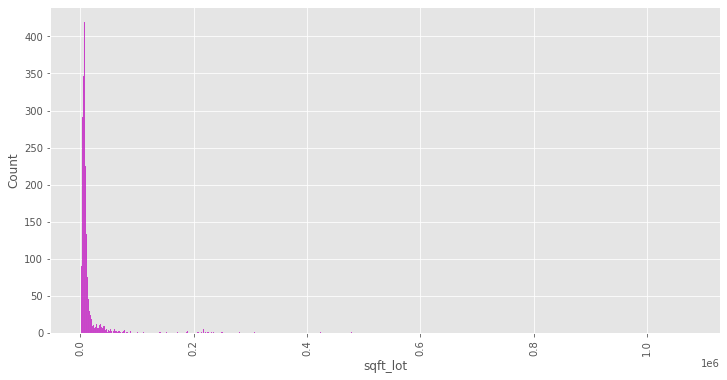

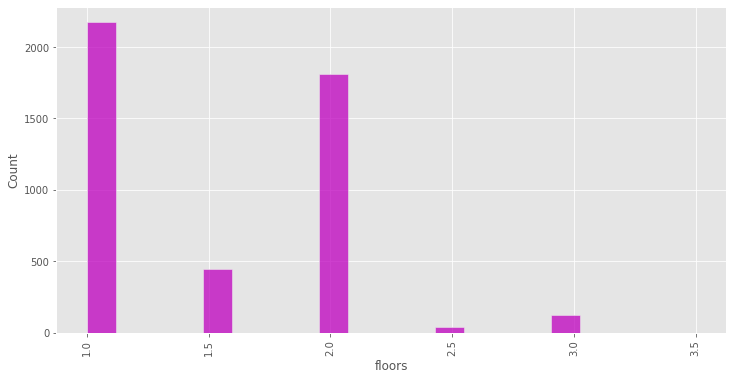

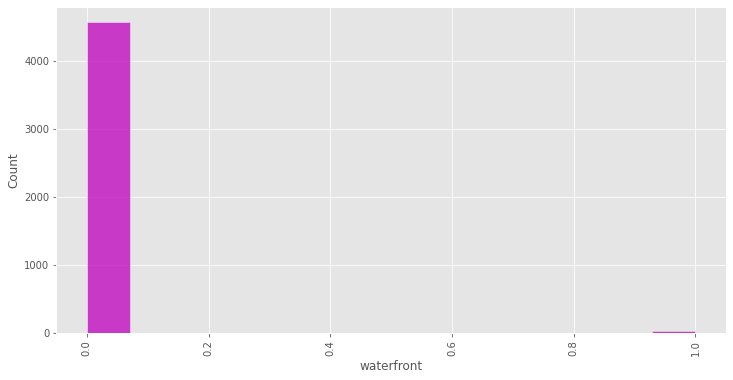

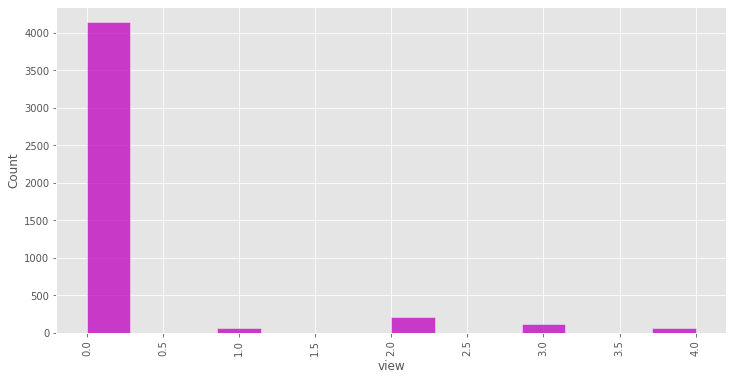

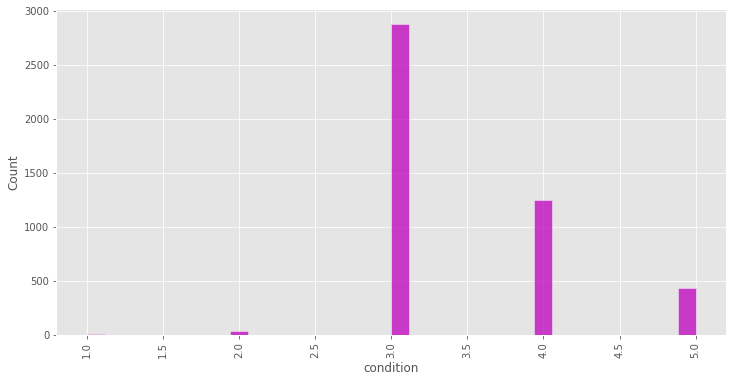

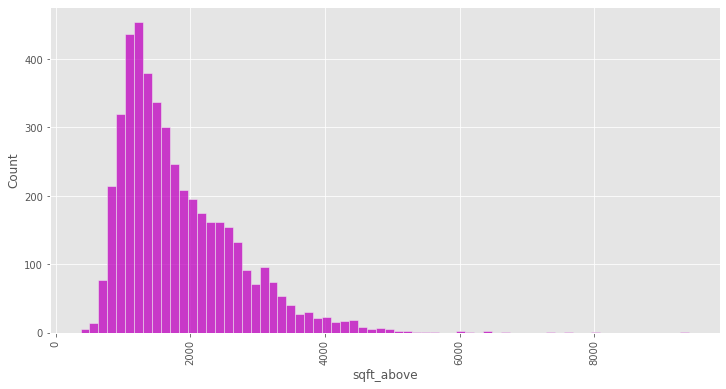

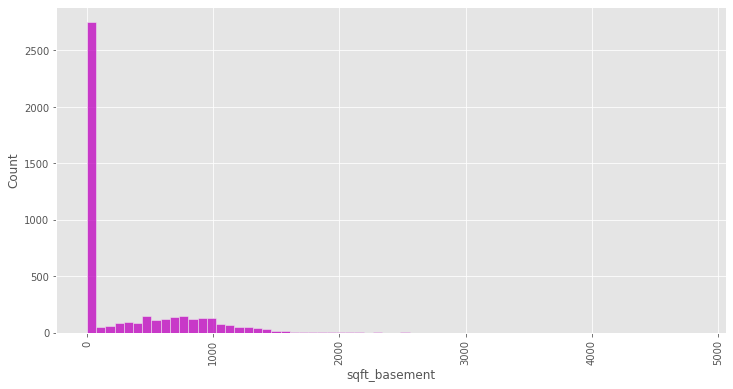

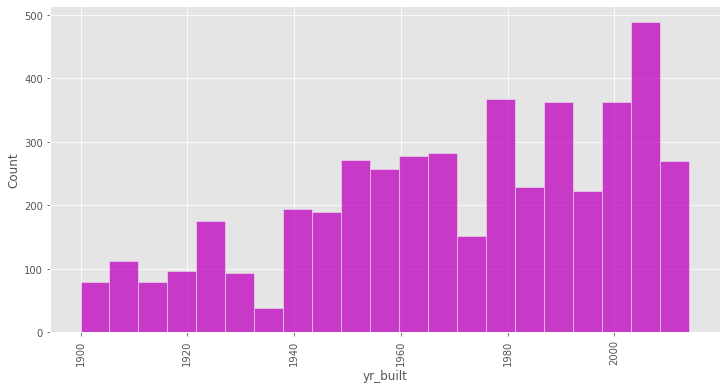

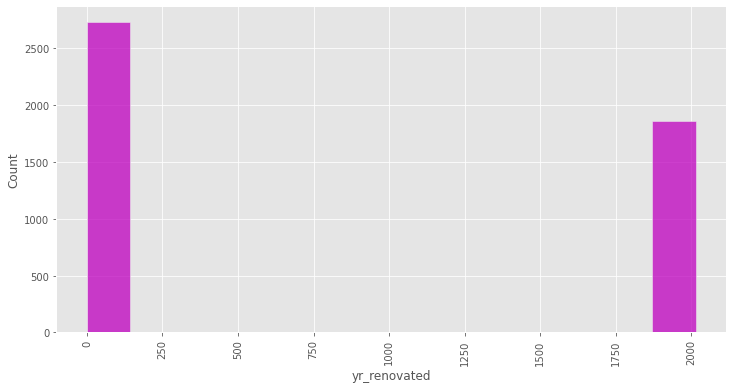

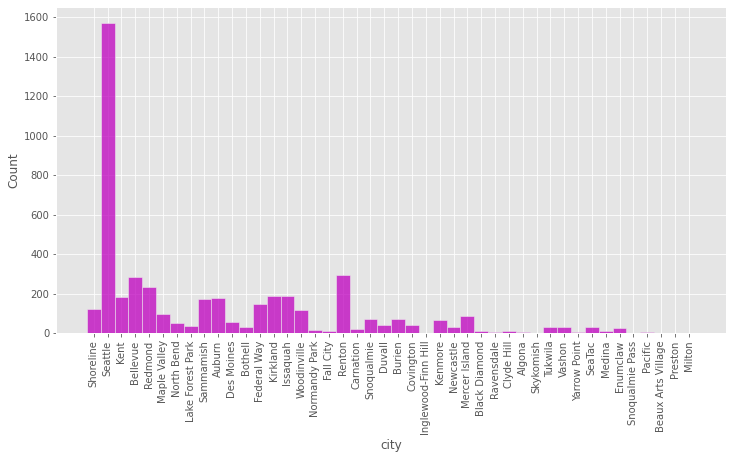

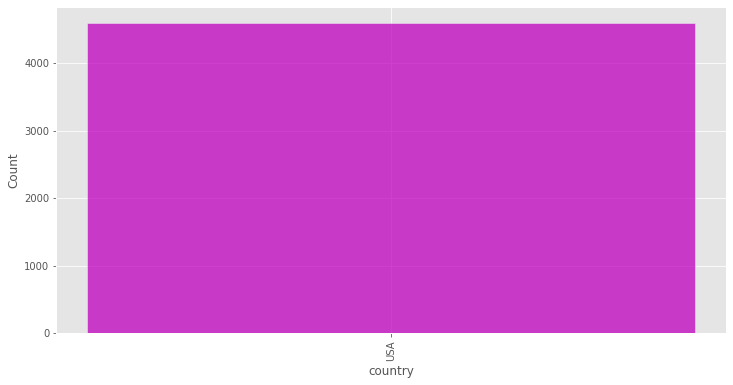

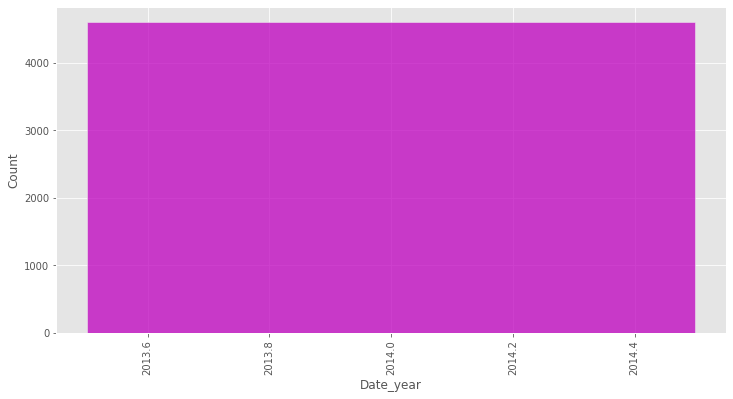

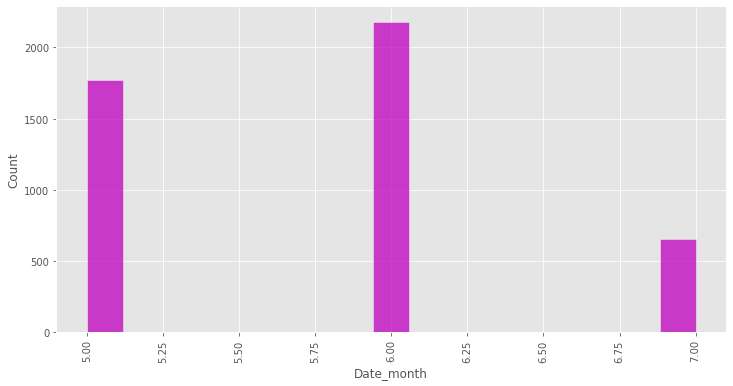

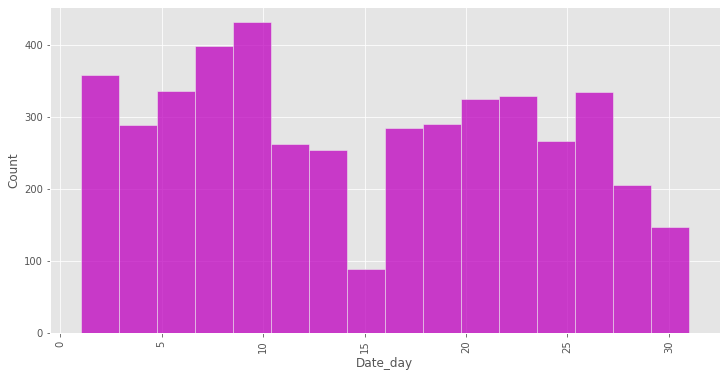

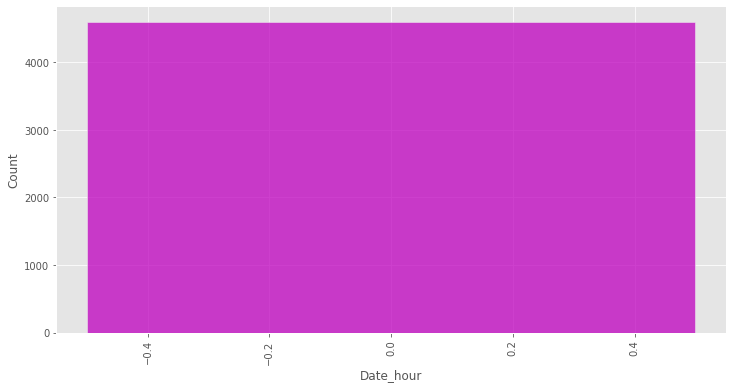

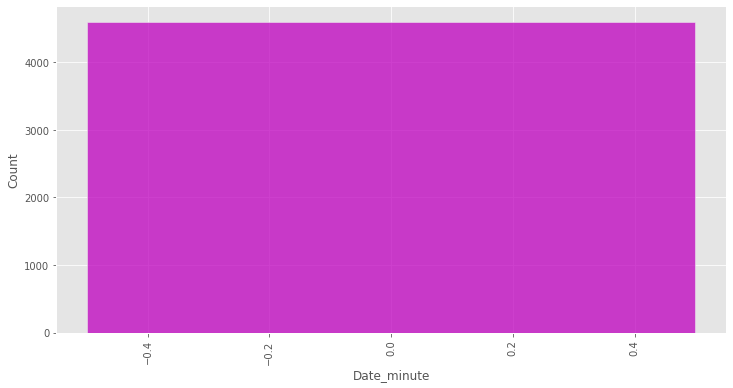

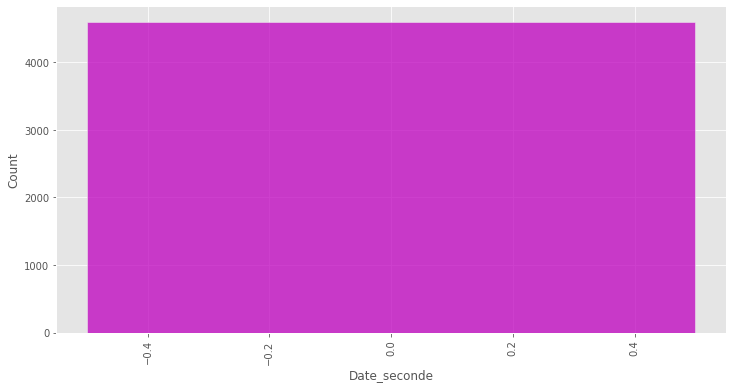

In [16]:
for col in data.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(data[col], color="m")
    plt.xticks(rotation=90)
    plt.show

This code snippet creates a histogram for each column in the DataFrame data using a for loop.

The loop iterates over each column in data, and for each column, a new figure is created using plt.figure(). The figure is set to be 12 inches wide and 6 inches tall using the figsize argument.

The sns.histplot() function from the seaborn library is then used to create a histogram of the data in the current column. The color argument is set to "m" to specify a shade of purple for the histogram.

The plt.xticks(rotation=90) line rotates the x-axis labels by 90 degrees to make them more readable when there are many categories.

Finally, plt.show() is called to display the plot for the current column.

This code allows the user to quickly generate histograms of all columns in the DataFrame data, which can be useful for exploring the distribution of the data and identifying any potential issues such as skewness, outliers, or missing values.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  country        4600 non-null   object 
 15  Date_year      4600 non-null   int64  
 16  Date_month     4600 non-null   int64  
 17  Date_day       4600 non-null   int64  
 18  Date_hou

This code snippet displays the summary of the DataFrame data using the .info() method.

The .info() method is a pandas method that provides a concise summary of a DataFrame, including the number of non-null values, the data types of each column, and the memory usage.

After executing the previous code to create histograms of each column, it is possible that the data in the DataFrame has been modified, for example by removing outliers or transforming certain columns. Running data.info() again will provide updated information about the DataFrame's structure, including any changes that have been made to the data since the previous data.info() call.

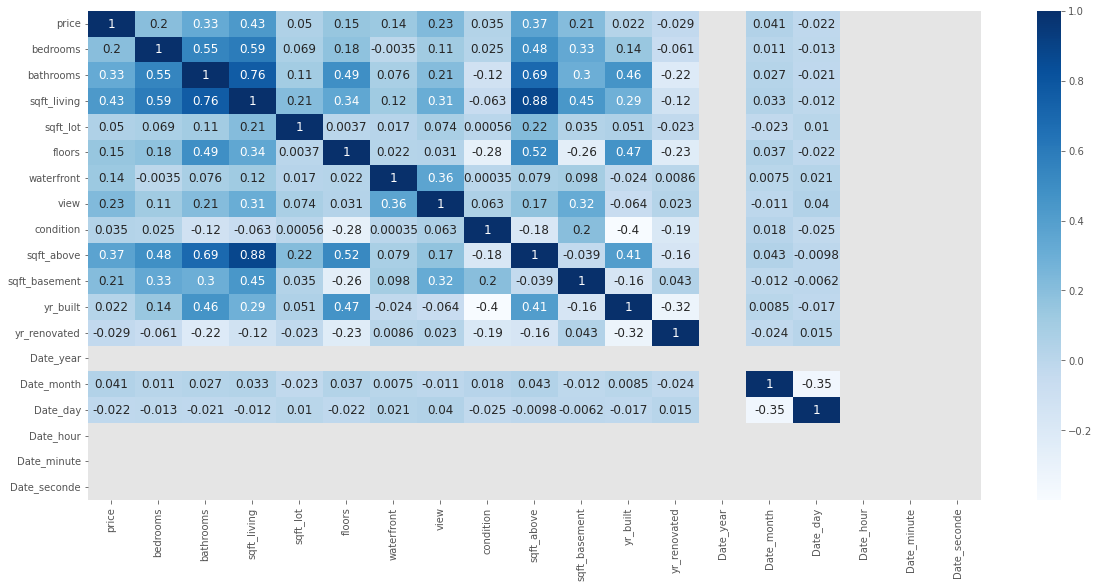

In [18]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(), annot=True, cmap="Blues", annot_kws={"fontsize":12})
plt.show()

This code snippet creates a heatmap of the correlation matrix for the DataFrame data using the sns.heatmap() function from the seaborn library.

The plt.figure() function is called to create a new figure for the plot, with a size of 20 inches wide and 9 inches tall.

The sns.heatmap() function is then used to create the heatmap. The data.corr() argument specifies that the function should use the correlation matrix of data as the data source for the plot. The annot=True argument specifies that the function should include the correlation coefficients in each cell of the heatmap.

The cmap="Blues" argument specifies that the function should use the "Blues" colormap to color the cells of the heatmap. The annot_kws={"fontsize":12} argument specifies that the font size of the correlation coefficients should be 12.

Finally, plt.show() is called to display the plot.

This code allows the user to quickly visualize the correlations between each pair of columns in the DataFrame data. The heatmap can be useful for identifying patterns and relationships in the data, as well as for selecting variables for further analysis or modeling.

#  Dimensionality Reduction

In [19]:
data=data.drop(["city","country"], axis=1)

This code snippet drops the city and country columns from the DataFrame data using the .drop() method.

The .drop() method is a pandas method used to remove rows or columns from a DataFrame based on their labels. In this case, the labels being dropped are the city and country columns.

The axis=1 argument specifies that the columns should be dropped (as opposed to a row), and the inplace=False argument (which is the default) specifies that the original DataFrame data should not be modified directly, but instead a new DataFrame will be returned with the columns dropped.

After this line of code is executed, the new DataFrame data will no longer contain the city and country columns, but the original DataFrame data still contains these columns.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)


This code snippet performs Principal Component Analysis (PCA) on the DataFrame data using the PCA class from the sklearn.decomposition module.

The PCA class is an implementation of PCA in scikit-learn, which is a technique for reducing the dimensionality of data while retaining the most important information. In this case, the n_components=2 argument specifies that the PCA should reduce the dimensionality of data to 2 dimensions.

The fit_transform() method is then called on the PCA object, which fits the PCA model to the data and transforms the data into the new lower-dimensional space.

After this line of code is executed, the DataFrame data will contain the transformed data with only two dimensions, which can be useful for visualizing the data in a two-dimensional space or for feeding the data into a machine learning model that requires lower-dimensional data. Note that the original DataFrame data is overwritten with the transformed data.

# KMeans Cluster

In [21]:
from sklearn.cluster import KMeans

This code snippet imports the KMeans class from the sklearn.cluster module.

The KMeans class is an implementation of the K-means clustering algorithm, which is a commonly used unsupervised learning technique for grouping data points into a specified number of clusters.

Once imported, the KMeans class can be used to instantiate a K-means object, which can then be fit to data using the .fit() method. The resulting object can then be used to predict cluster labels for new data points using the .predict() method.

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

This code snippet performs K-means clustering on the transformed DataFrame data using the KMeans class from scikit-learn.

The n_clusters=4 argument specifies that the algorithm should group the data points into 4 clusters.

The kmeans.fit() method fits the K-means model to the transformed data.

The kmeans.predict() method is then called on the transformed data to assign each data point to a cluster based on the fitted model. The resulting cluster labels are stored in the cluster_labels variable.

After this code is executed, the data points in data have been assigned to one of four clusters based on their similarity to one another in terms of their principal components. These clusters can be further analyzed and visualized to gain insights about the data.

In [23]:
cluster_labels

array([1, 3, 1, ..., 1, 1, 1], dtype=int32)

cluster_labels is a NumPy array containing the predicted cluster labels for each data point in the transformed DataFrame data, as assigned by the K-means algorithm.

Each element in cluster_labels corresponds to a row in data, and the value of the element indicates which cluster the corresponding data point has been assigned to by the algorithm. For example, if cluster_labels[0] is 2, this means that the first data point in data has been assigned to cluster 2 by the K-means algorithm.

This information can be used to further analyze the clusters and understand patterns or relationships within the data.

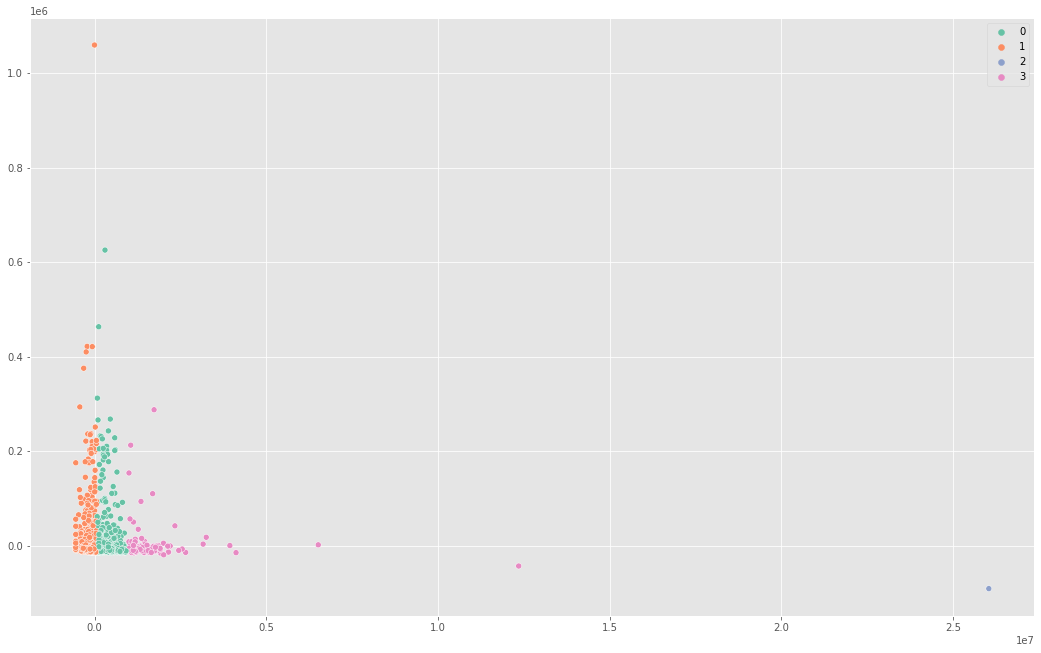

In [24]:
plt.figure(figsize=(18,11))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=cluster_labels, palette="Set2")
plt.show()

This code snippet creates a scatter plot of the transformed DataFrame data using the sns.scatterplot() function from the seaborn library.

The plt.figure() function is called to create a new figure for the plot, with a size of 18 inches wide and 11 inches tall.

The sns.scatterplot() function is then used to create the scatter plot. The x and y arguments specify that the plot should use the first and second columns of the transformed data as the x- and y-coordinates of the points, respectively.

The hue argument is set to cluster_labels, which specifies that the color of each point should be determined by its cluster label. The palette argument is set to "Set2", which specifies the color palette to use for the different clusters.

Finally, plt.show() is called to display the plot.

This code allows the user to visualize the clusters identified by the K-means algorithm in the transformed two-dimensional space. By coloring the points by their cluster labels, the plot shows which data points belong to each cluster and how the clusters are separated from one another. This visualization can be useful for gaining insights into the structure of the data and for identifying any potential outliers or patterns within the data.

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

This code snippet performs K-means clustering on the transformed DataFrame data using the KMeans class from scikit-learn.

The n_clusters=4 argument specifies that the algorithm should group the data points into 4 clusters.

The kmeans.fit() method fits the K-means model to the transformed data.

The kmeans.predict() method is then called on the transformed data to assign each data point to a cluster based on the fitted model. The resulting cluster labels are stored in the cluster_labels variable.

After this code is executed, the data points in data have been assigned to one of four clusters based on their similarity to one another in terms of their principal components. These clusters can be further analyzed and visualized to gain insights about the data.

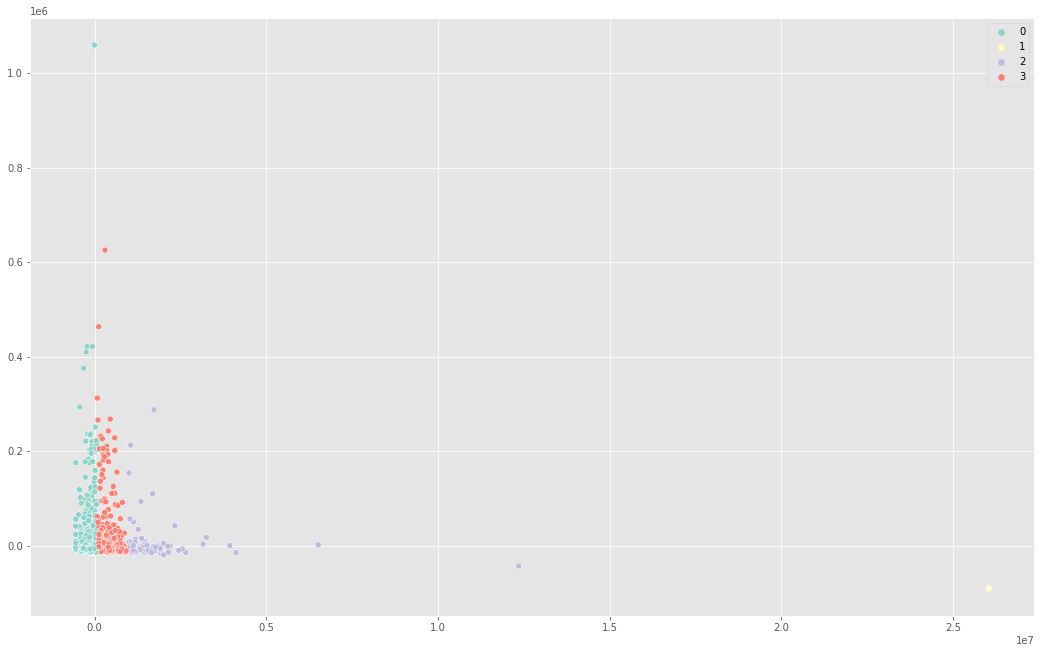

In [26]:
plt.figure(figsize=(18,11))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=cluster_labels, palette="Set3")
plt.show()

# DBSCAN clustering

_________________________________________________________________________________________

here we gonne use T-SNE: T-distributed Stochastic Neighbor Embedding 

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tsnedata = tsne.fit_transform(data)

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
db_scan = DBSCAN(eps=0.6, min_samples=20).fit(tsnedata)

In [30]:
db_scan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

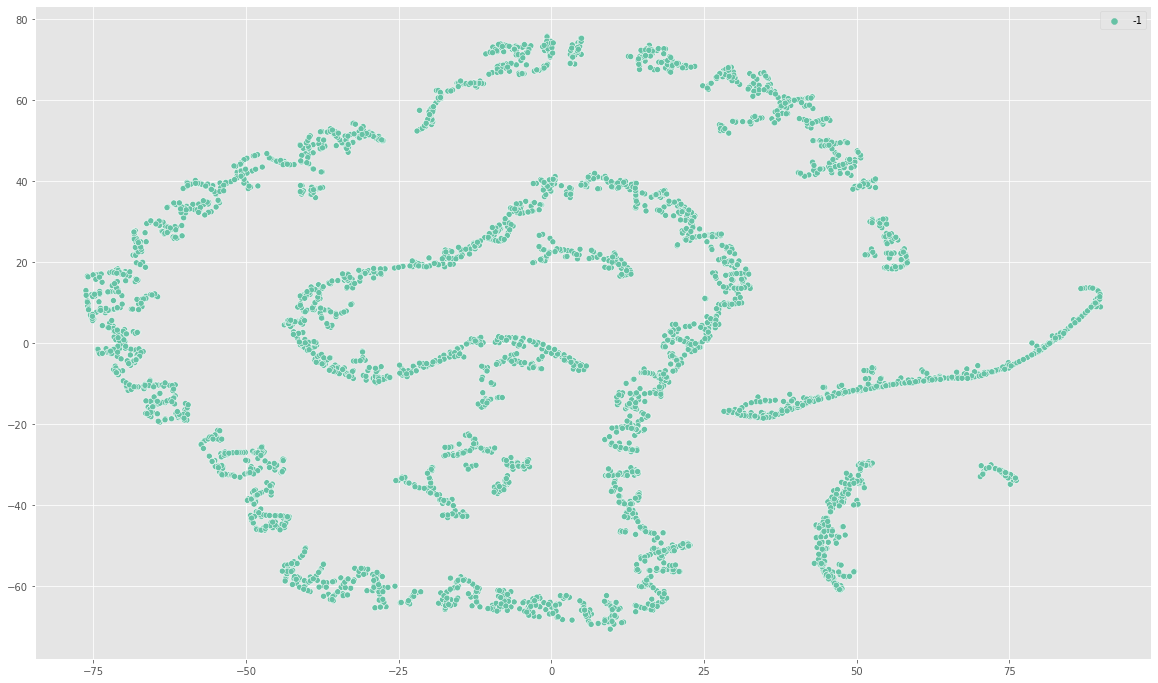

In [31]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsnedata[:,0], y=tsnedata[:,1], hue=db_scan.labels_, palette="Set2")
plt.show()

# GaussianMixture clustering

In [32]:
from sklearn.mixture import GaussianMixture

In [33]:
gm = GaussianMixture(n_components=2, random_state=0).fit(tsnedata)
ls = gm.predict(tsnedata)

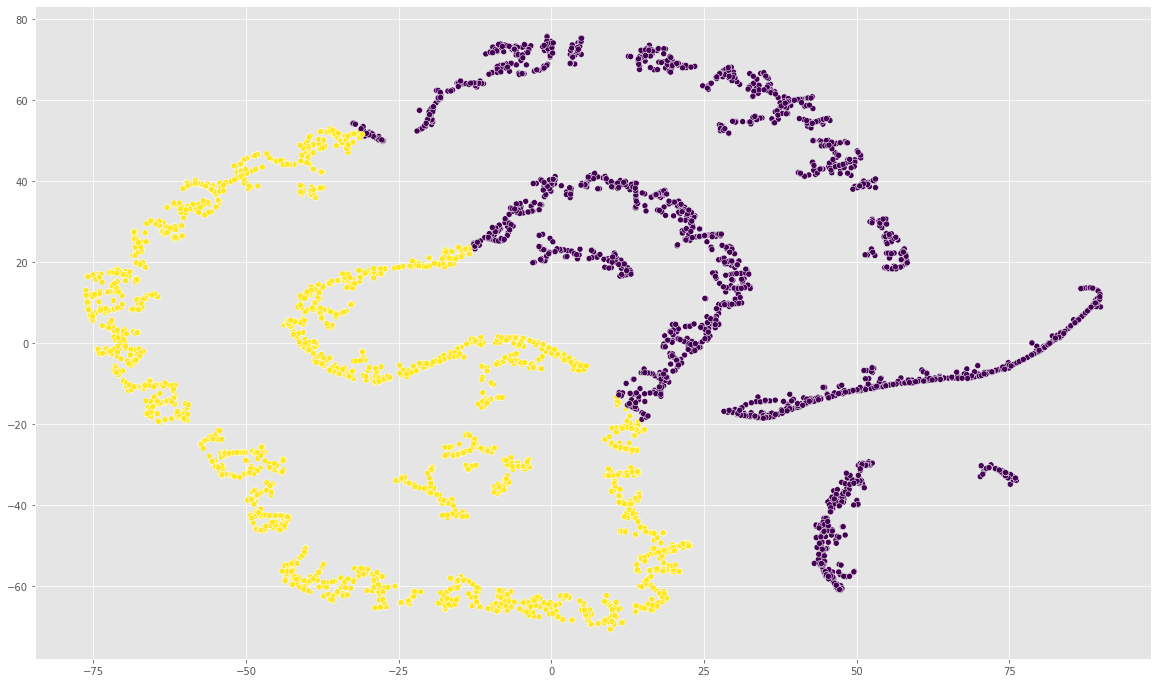

In [34]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsnedata[:,0], y=tsnedata[:,1],c=ls ,palette="Set2")
plt.show()